In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt



/Users/davidhoffman/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
AMZN = "/Users/davidhoffman/desktop/stocks_download/AMZN_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(AMZN)

In [3]:
#Making sure date is in datetime
df['Date'] = pd.to_datetime(df.Date)

#Setting the date as the index
df.set_index('Date', inplace=True)

In [4]:
#Only keep closing price of the day
#df.drop(['Open','High','Low'], axis = 1, inplace = True)
df.drop(['Volume'], axis = 1, inplace = True)

#df.drop(['Name'], axis = 1, inplace = True)

- I am going to analyze moving average technical analysis and see if common trading strategies would work
- The trading philosophy states that when the shorter moving average crosses above the longer term moving average it is a buy signal and to sell when the shorter crosses below the long term

- I am going to create new columns, each for a rolling mean (moving average)

In [5]:
df['rolling_close_5'] = df.Close.rolling(window=5, center=False).mean()
df['rolling_close_10'] = df.Close.rolling(window=10, center=False).mean()
df['rolling_close_20'] = df.Close.rolling(window=20, center=False).mean()
df['rolling_close_50'] = df.Close.rolling(window=50, center=False).mean()
df['rolling_close_100'] = df.Close.rolling(window=100, center=False).mean()
df['rolling_close_200'] = df.Close.rolling(window=200, center=False).mean()

date_ticks = df.index



In [6]:
df.head()

,Open,High,Low,Close,Name,rolling_close_5,rolling_close_10,rolling_close_20,rolling_close_50,rolling_close_100,rolling_close_200
Date,,,,,,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,AMZN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,47.48,47.73,46.69,47.25,AMZN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,47.16,48.20,47.11,47.65,AMZN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,47.97,48.58,47.32,47.87,AMZN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,46.55,47.10,46.40,47.08,AMZN,47.486,NaN,NaN,NaN,NaN,NaN


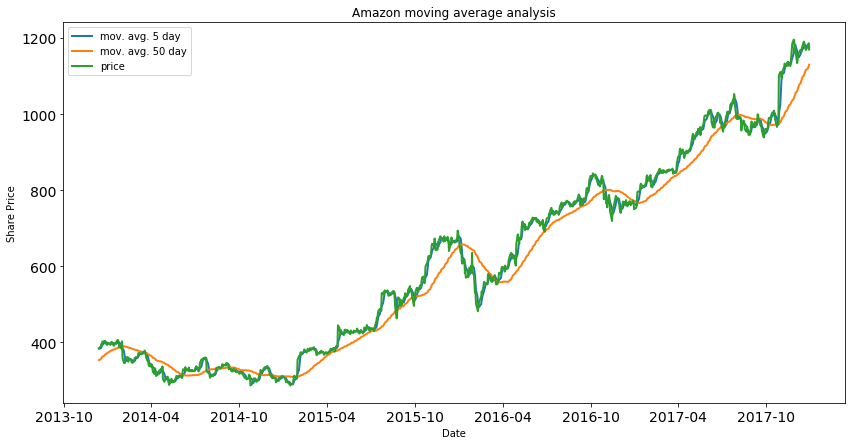

In [7]:
plt.figure(figsize=(14,7))

plt.plot(date_ticks[2000:], df.rolling_close_5[2000:] ,lw=2,label='mov. avg. 5 day')
plt.plot(date_ticks[2000:],df.rolling_close_50[2000:], lw=2,label='mov. avg. 50 day')
plt.plot(date_ticks[2000:],df.Close[2000:], lw=2,label='price')
plt.tick_params(labelsize=14)
plt.title("Amazon moving average analysis")
plt.xlabel('Date')
plt.ylabel("Share Price")
plt.legend()
plt.show()

In [106]:
#Counts days one is higher than the other
high_price_short = 0
high_price_long = 0
for i in range(0,len(df[2000:])):
    if df.rolling_close_5[i] > df.rolling_close_50[i]:
        high_price_short = high_price_short +1
    else:
        high_price_long = high_price_long + 1
print (high_price_short)
print (high_price_long)

640
379


In [107]:
"""price = 0
count = 0
start = 0
for i in range(0,len(df[2000:])):
    if i == 0:
        if df.rolling_close_5[i] > df.rolling_close_50[i]:
            price == df.rolling_close_5[i]
            start == 1
        else:
            price == df.rolling_close_50[i]
            start == 0
    else:
        if start == 1:
            if df.rolling_close_5[i] > df.rolling_close_50[i]:
                pass
        else:
            

            switch_days= []
start = 0

for i in range(50,df.shape[0]):
    short_price = df.rolling_close_5[i]
    long_price = df.rolling_close_50[i]
    if i == 50:
        if short_price > long_price:
            start == 1
        else:
            start == 0
    else:
        if start == 1:
            if short_price > long_price:
                pass
            else:
                start == 0
                switch_days.append(i)
        elif start == 0:
            if long_price > short_price:
                pass
            else:
                start == 1
                switch_days.append(i)
        else:
            pass
            
                
switch_days            

""""""#price switch
switch_index = []
short_price = 0
long_price = 0
count = 0
start = 0
for i in range(0,df.shape[0]):
    if i == 0:
        if df.rolling_close_5[i] > df.rolling_close_50[i]:
            price == df.rolling_close_5[i]
            start == 1
        else:
            price == df.rolling_close_50[i]
            start == 0
    else:
        if start == 1:
            if df.rolling_close_5[i] > df.rolling_close_50[i]:
                pass
            else:
                switch_index.append(i)
        else:
            if df.rolling_close_50[i] > df.rolling_close_5[i]:
                pass
            else:
                switch_index.append(i)
switch_index        
"""

'price = 0\ncount = 0\nstart = 0\nfor i in range(0,len(df[2000:])):\n    if i == 0:\n        if df.rolling_close_5[i] > df.rolling_close_50[i]:\n            price == df.rolling_close_5[i]\n            start == 1\n        else:\n            price == df.rolling_close_50[i]\n            start == 0\n    else:\n        if start == 1:\n            if df.rolling_close_5[i] > df.rolling_close_50[i]:\n                pass\n        else:\n            \n\n            switch_days= []\nstart = 0\n\nfor i in range(50,df.shape[0]):\n    short_price = df.rolling_close_5[i]\n    long_price = df.rolling_close_50[i]\n    if i == 50:\n        if short_price > long_price:\n            start == 1\n        else:\n            start == 0\n    else:\n        if start == 1:\n            if short_price > long_price:\n                pass\n            else:\n                start == 0\n                switch_days.append(i)\n        elif start == 0:\n            if long_price > short_price:\n                pass\n 

In [108]:
switch_index = []
short_price = 0
long_price = 0
count = 0
start = 0

for i in range(50,df.shape[0]):
    short_price = df.rolling_close_5[i]
    long_price = df.rolling_close_50[i]

    if short_price > long_price:
        switch_index.append("s")
    else:
        switch_index.append("l")
    

switch_index

['l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 'l',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's'

In [109]:
len(switch_index)

2969

In [110]:
switch_dict=dict(enumerate(switch_index))
short_price = 0
long_price = 0
buy_sell_dict = {}
for i in switch_dict:
    if i == 0:
        pass
    elif switch_dict[i] == "l" and switch_dict[i - 1] == "l": 
        pass
    elif switch_dict[i] == "l" and switch_dict[i - 1] == "s":
        print ("sell")
        buy_sell_dict[i+50] = "sell"
    elif switch_dict[i] == "s" and switch_dict[i - 1] == "s":
        pass
    elif switch_dict[i] == "s" and switch_dict[i - 1] == "l":
        print ("buy")
        buy_sell_dict[i+50] = "buy"

    else:
        pass 

    
        

buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy


In [111]:
buy_sell_dict

{116: 'buy',
 133: 'sell',
 170: 'buy',
 253: 'sell',
 278: 'buy',
 292: 'sell',
 304: 'buy',
 462: 'sell',
 482: 'buy',
 508: 'sell',
 558: 'buy',
 593: 'sell',
 595: 'buy',
 625: 'sell',
 647: 'buy',
 681: 'sell',
 742: 'buy',
 848: 'sell',
 852: 'buy',
 855: 'sell',
 856: 'buy',
 874: 'sell',
 877: 'buy',
 882: 'sell',
 888: 'buy',
 912: 'sell',
 916: 'buy',
 921: 'sell',
 931: 'buy',
 1013: 'sell',
 1049: 'buy',
 1091: 'sell',
 1153: 'buy',
 1274: 'sell',
 1285: 'buy',
 1295: 'sell',
 1319: 'buy',
 1365: 'sell',
 1379: 'buy',
 1409: 'sell',
 1426: 'buy',
 1466: 'sell',
 1524: 'buy',
 1534: 'sell',
 1536: 'buy',
 1544: 'sell',
 1556: 'buy',
 1560: 'sell',
 1562: 'buy',
 1643: 'sell',
 1648: 'buy',
 1708: 'sell',
 1737: 'buy',
 1788: 'sell',
 1789: 'buy',
 1798: 'sell',
 1801: 'buy',
 1811: 'sell',
 1829: 'buy',
 1836: 'sell',
 1838: 'buy',
 1840: 'sell',
 1851: 'buy',
 1917: 'sell',
 1933: 'buy',
 2032: 'sell',
 2063: 'buy',
 2066: 'sell',
 2119: 'buy',
 2157: 'sell',
 2170: 'buy',


In [112]:
#since it begins with a buy
profit = 0
purchase_price = 0
sell_price = 0
for i in buy_sell_dict:
    if i == sorted(buy_sell_dict.keys())[-1]:
        if buy_sell_dict[i] == "buy":
            break
    elif buy_sell_dict[i] =="buy":
        purchase_price = df.Close[i]
        print ("purchase price",price,"profit", profit)
    elif buy_sell_dict[i]=="sell":
        if purchase_price == 0:
            pass
        else:
            sell_price=df.Close[i]
            profit += purchase_price - sell_price
            print ("sell price", price, "profit", profit)
    else:
        pass
    
        
        
    
        
print ("profit of", profit) 

purchase price 0 profit 0
sell price 0 profit 2.559999999999995
purchase price 0 profit 2.559999999999995
sell price 0 profit -5.010000000000002
purchase price 0 profit -5.010000000000002
sell price 0 profit -3.2099999999999973
purchase price 0 profit -3.2099999999999973
sell price 0 profit -49.39
purchase price 0 profit -49.39
sell price 0 profit -42.74000000000001
purchase price 0 profit -42.74000000000001
sell price 0 profit -42.13000000000001
purchase price 0 profit -42.13000000000001
sell price 0 profit -40.67
purchase price 0 profit -40.67
sell price 0 profit -34.000000000000014
purchase price 0 profit -34.000000000000014
sell price 0 profit -58.70000000000002
purchase price 0 profit -58.70000000000002
sell price 0 profit -60.71000000000002
purchase price 0 profit -60.71000000000002
sell price 0 profit -61.99000000000002
purchase price 0 profit -61.99000000000002
sell price 0 profit -54.59000000000002
purchase price 0 profit -54.59000000000002
sell price 0 profit -52.160000000000

In [113]:
2898, 2915, 2961

(2898, 2915, 2961)

In [114]:
df.Close[2898], df.Close[2915], df.Close[2961]

(994.13, 986.92, 990.99)

In [115]:
#116: 'buy',
 #133: 'sell',
 #170: 'buy',
 #253: 'sell',
 #278: 'buy',
 #292: 'sell',
    
    
df.Close[116]-df.Close[133]+df.Close[170]-df.Close[253]

-5.009999999999998

In [116]:
df.Close[116]

35.48

In [117]:
def moving_average_analysis(df, short_moving, long_moving):
    short_moving=int(short_moving)
    long_moving=int(long_moving)

    switch_index = []
    short_price = 0
    long_price = 0
    count = 0
    start = 0

    
    df['short_roll'] = df.Close.rolling(window= short_moving, center=False).mean()
    df['long_roll'] = df.Close.rolling(window=long_moving, center=False).mean()

    
    
    for i in range(long_moving,df.shape[0]):
        short_price = df.short_roll[i]
        long_price = df.long_roll[i]
        
        if short_price > long_price:
            switch_index.append("s")
        else:
            switch_index.append("l")
        
    switch_dict=dict(enumerate(switch_index))
    short_price = 0
    long_price = 0
    buy_sell_dict = {}
    for i in switch_dict:
        if i == 0:
            pass
        elif switch_dict[i] == "l" and switch_dict[i - 1] == "l": 
            pass
        elif switch_dict[i] == "l" and switch_dict[i - 1] == "s":
            print ("sell")
            buy_sell_dict[i+long_moving] = "sell"
        elif switch_dict[i] == "s" and switch_dict[i - 1] == "s":
            pass
        elif switch_dict[i] == "s" and switch_dict[i - 1] == "l":
            print ("buy")
            buy_sell_dict[i+long_moving] = "buy"
        else:
            pass 

    
    #since it begins with a buy
    profit = 0
    purchase_price = 0
    sell_price = 0
    for i in buy_sell_dict:
        if i == sorted(buy_sell_dict.keys())[-1]:
            if buy_sell_dict[i] == "buy":
                break
        elif buy_sell_dict[i] =="buy":
            purchase_price = df.Close[i]
            print ("purchase price",price,"profit", profit)
        elif buy_sell_dict[i]=="sell":
            sell_price=df.Close[i]
            profit += purchase_price - sell_price
            print ("sell price", price, "profit", profit)
            #price = 0
        else:
            pass 
    print ("profit of", profit) 

In [118]:
moving_average_analysis(df=df, short_moving = 5, long_moving = 50)

buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
sell
buy
purchase price 0 profit 0
sell price 0 profit 2.559999999999995
purchase price 0 profit 2.559999999999995
sell price 0 profit -5.010000000000002
purchase price 0 profit -5.010000000000002
sell price 0 profit -3.2099999999999973
purchase price 0 profit -3.2099999999999973
sell price 0 profit -49.39
purchase price 0 profit -49.39
sell price 0 profit -42.74000000000001
purchase price 0 profit -42.74000000000001
sell price 0 profit -42.13000000000001
purchase price 0 profit -42.13000000000001
sell price 0 profit -40.67
purchase price 0 profit -40.67
sell price 0 profit -34.000000000000014
purchase price 0 profit -3

In [119]:
#{116: 'buy',
# 133: 'sell',
# 170: 'buy',
# 253: 'sell',
# 278: 'buy',
# 292: 'sell',
# 304: 'buy',
# 462: 'sell',
# 482: 'buy',
# 508: 'sell',
 
x = (df.Close[116]-df.Close[133]+df.Close[170]-df.Close[253]+df.Close[278]
 -df.Close[292]+df.Close[304]-df.Close[462]+df.Close[482]-df.Close[508])

rev_x = (df.Close[133]-df.Close[170]+df.Close[253]-df.Close[278]
 +df.Close[292]-df.Close[304]+df.Close[462]-df.Close[482]+df.Close[508])

rev_x

78.22000000000001

In [120]:
df.Close[50]

36.77

In [121]:
df.Close[3000]

1133.95

In [122]:
def moving_average_analysis(df, short_moving, long_moving):
    short_moving=int(short_moving)
    long_moving=int(long_moving)

    switch_index = []
    short_price = 0
    long_price = 0
    count = 0
    start = 0

    
    df['short_roll'] = df.Close.rolling(window= short_moving, center=False).mean()
    df['long_roll'] = df.Close.rolling(window=long_moving, center=False).mean()

    
    
    for i in range(long_moving,df.shape[0]):
        short_price = df.short_roll[i]
        long_price = df.long_roll[i]
        
        if short_price > long_price:
            switch_index.append("s")
        else:
            switch_index.append("l")
        
    switch_dict=dict(enumerate(switch_index))
    short_price = 0
    long_price = 0
    buy_sell_dict = {}
    for i in switch_dict:
        if i == 0:
            pass
        elif switch_dict[i] == "l" and switch_dict[i - 1] == "l": 
            pass
        elif switch_dict[i] == "l" and switch_dict[i - 1] == "s":
            #print ("sell")
            buy_sell_dict[i+long_moving] = "sell"
        elif switch_dict[i] == "s" and switch_dict[i - 1] == "s":
            pass
        elif switch_dict[i] == "s" and switch_dict[i - 1] == "l":
            #print ("buy")
            buy_sell_dict[i+long_moving] = "buy"
        else:
            pass 

    
    #since it begins with a buy
    profit = 0
    purchase_price = 0
    sell_price = 0
    for i in buy_sell_dict:
        if i == sorted(buy_sell_dict.keys())[-1]:
            if buy_sell_dict[i] == "buy":
                break
        elif buy_sell_dict[i] =="buy":
            purchase_price = df.Close[i]
            #print ("purchase price",price,"profit", profit)
        elif buy_sell_dict[i]=="sell":
            sell_price=df.Close[i]
            profit += sell_price - purchase_price
            #print ("sell price", price, "profit", profit)
            #price = 0
        else:
            pass 
    print ("profit of", profit)
    #add in starting price, ending price, how the index fared, transaction costs

In [123]:
moving_average_analysis(df=df, short_moving=5, long_moving=50)

profit of 782.7499999999999
